=== MA(2) Model Summary ===
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1397.373
Date:                Sun, 11 May 2025   AIC                           2802.746
Time:                        20:17:39   BIC                           2822.377
Sample:                             0   HQIC                          2810.207
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0341      0.054      0.637      0.524      -0.071       0.139
ma.L1          0.4840      0.032     15.248      0.000       0.422       0.546
ma.L2          0.2387   

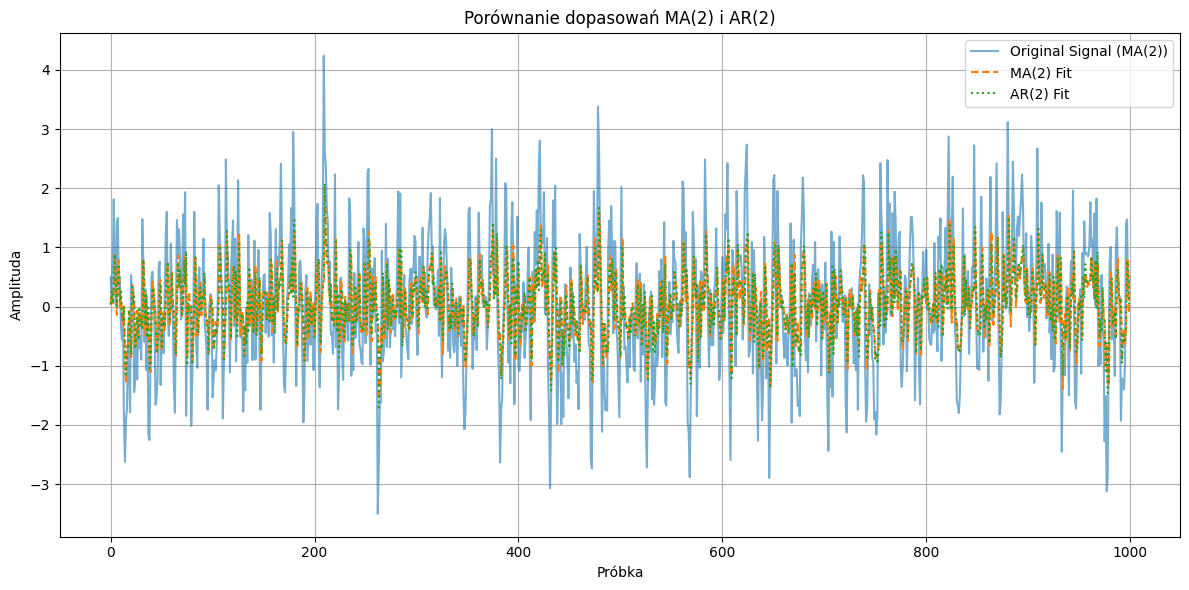

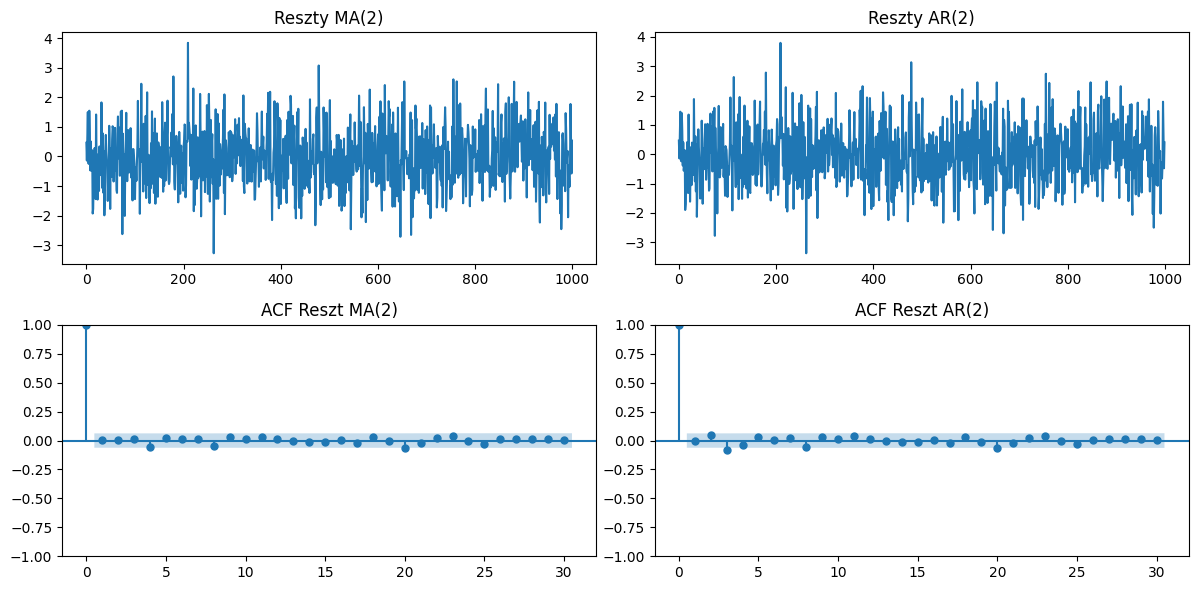

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# --- 1. Generowanie sygnału MA(2) ---
np.random.seed(42)
N = 1000
w = np.random.normal(0, 1, N)
b = [1.0, 0.5, 0.25]  # MA(2) coefficients
ma_signal = lfilter(b, [1], w)

# --- 2. Dopasowanie modelu MA(2) ---
ma_model = ARIMA(ma_signal, order=(0, 0, 2))
ma_result = ma_model.fit()
print("=== MA(2) Model Summary ===")
print(ma_result.summary())

# --- 3. Dopasowanie modelu AR(2) ---
ar_model = ARIMA(ma_signal, order=(2, 0, 0))
ar_result = ar_model.fit()
print("\n=== AR(2) Model Summary ===")
print(ar_result.summary())

# --- 4. Porównanie wykresów dopasowania ---
plt.figure(figsize=(12,6))
plt.plot(ma_signal, label='Original Signal (MA(2))', alpha=0.6)
plt.plot(ma_result.fittedvalues, label='MA(2) Fit', linestyle='--')
plt.plot(ar_result.fittedvalues, label='AR(2) Fit', linestyle=':')
plt.legend()
plt.title('Porównanie dopasowań MA(2) i AR(2)')
plt.xlabel('Próbka')
plt.ylabel('Amplituda')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 5. Analiza reszt ---
resid_ma = ma_result.resid
resid_ar = ar_result.resid

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs[0, 0].plot(resid_ma)
axs[0, 0].set_title('Reszty MA(2)')
axs[0, 1].plot(resid_ar)
axs[0, 1].set_title('Reszty AR(2)')

plot_acf(resid_ma, ax=axs[1, 0], lags=30)
axs[1, 0].set_title('ACF Reszt MA(2)')
plot_acf(resid_ar, ax=axs[1, 1], lags=30)
axs[1, 1].set_title('ACF Reszt AR(2)')

plt.tight_layout()
plt.show()
